<H2>Data Analysis of Bike Riders using Ford GoBike System (now Bay Wheels as of June 2019)</H2>

<h2>Investigation Overview</h2>

In this investigation, we will look at attributes regarding the Ford GoBike System (now Bay Wheels as of June 2019).  Among the attributes we will look at are which days of the week and times have the most bike riders; bike durations between genders; and age groups among bike riders.

<h2>Dataset Overview</h2>

The dataset used for this investigation is Ford GoBike's trip data from April 2019.  The attributes included Subscriber/Customer users, gender, age groups, and start/end times.  For this slide deck, we will use the cleaned up version of the original dataset.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
gobike = pd.read_csv('gobike_clean_master.csv')

In [3]:
gobike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 226210 entries, 0 to 226209
Data columns (total 20 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             226210 non-null  int64  
 1   start_time               226210 non-null  object 
 2   end_time                 226210 non-null  object 
 3   start_station_id         226210 non-null  float64
 4   start_station_name       226210 non-null  object 
 5   start_station_latitude   226210 non-null  float64
 6   start_station_longitude  226210 non-null  float64
 7   end_station_id           226210 non-null  float64
 8   end_station_name         226210 non-null  object 
 9   end_station_latitude     226210 non-null  float64
 10  end_station_longitude    226210 non-null  float64
 11  bike_id                  226210 non-null  int64  
 12  user_type                226210 non-null  object 
 13  member_birth_year        226210 non-null  int64  
 14  memb

In [4]:
# Convert the start_time_dayofweek to ordinal variables.
weekdays = ['Mon','Tue','Wed','Thu','Fri', 'Sat', 'Sun']
ordered_weekdays = pd.api.types.CategoricalDtype(ordered = True, categories = weekdays)
gobike['start_time_dayofweek'] = gobike['start_time_dayofweek'].astype(ordered_weekdays)

In [5]:
gobike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 226210 entries, 0 to 226209
Data columns (total 20 columns):
 #   Column                   Non-Null Count   Dtype   
---  ------                   --------------   -----   
 0   duration_sec             226210 non-null  int64   
 1   start_time               226210 non-null  object  
 2   end_time                 226210 non-null  object  
 3   start_station_id         226210 non-null  float64 
 4   start_station_name       226210 non-null  object  
 5   start_station_latitude   226210 non-null  float64 
 6   start_station_longitude  226210 non-null  float64 
 7   end_station_id           226210 non-null  float64 
 8   end_station_name         226210 non-null  object  
 9   end_station_latitude     226210 non-null  float64 
 10  end_station_longitude    226210 non-null  float64 
 11  bike_id                  226210 non-null  int64   
 12  user_type                226210 non-null  object  
 13  member_birth_year        226210 non-null  in

<h2>Visualizations of bike rider statistics</h2>

According to the below data plots:
1.  The day and time where the data between male and female riders, between Subscribers and Customers, is the highest is Tuesdays at 5:00 PM
2.  There are more male riders at 5:00 PM; more female riders at both 8:00 AM and 5:00 PM
3.  Tuesdays have more Subscriber riders than Customers; Saturdays have more Customer riders than Subscribers

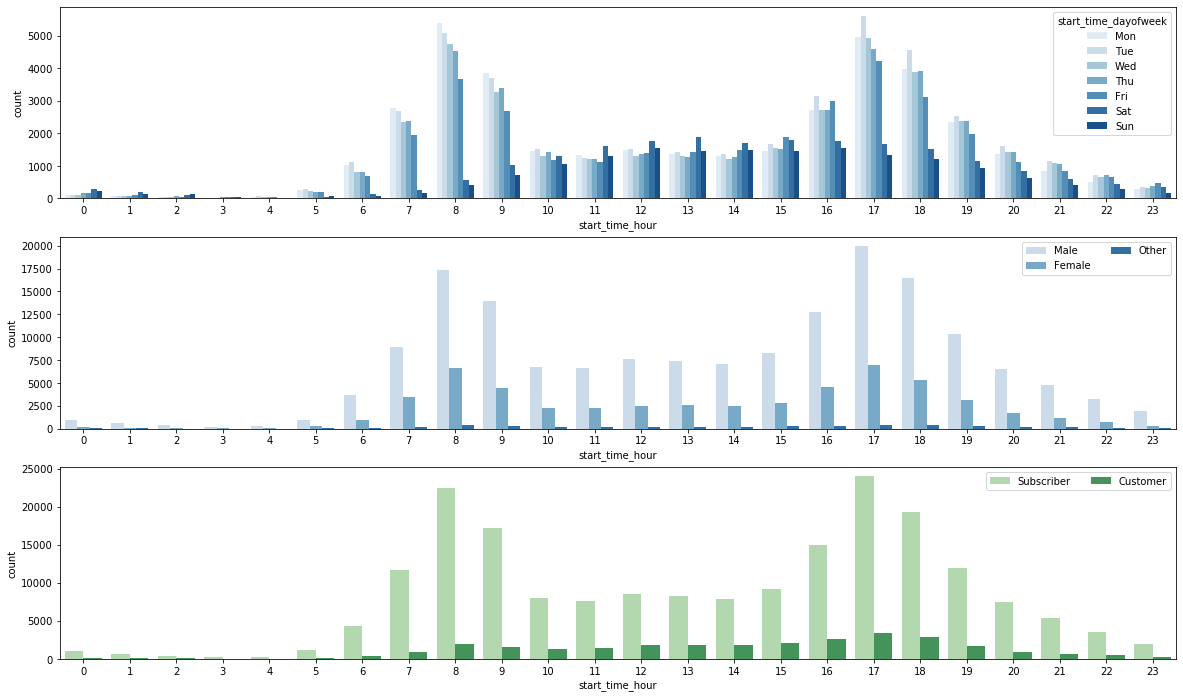

In [6]:
plt.figure(figsize = [20, 12]);

plt.subplot(3, 1, 1);
sb.countplot(data = gobike, x = 'start_time_hour', hue = 'start_time_dayofweek', palette = 'Blues');

ax = plt.subplot(3, 1, 2);
sb.countplot(data = gobike, x = 'start_time_hour', hue = 'member_gender', palette = 'Blues');
ax.legend(ncol = 2);  # re-arrange legend to reduce overlapping

ax = plt.subplot(3, 1, 3);
sb.countplot(data = gobike, x = 'start_time_hour', hue = 'user_type', palette = 'Greens');
ax.legend(loc = 1, ncol = 2); # re-arrange legend to remove overlapping

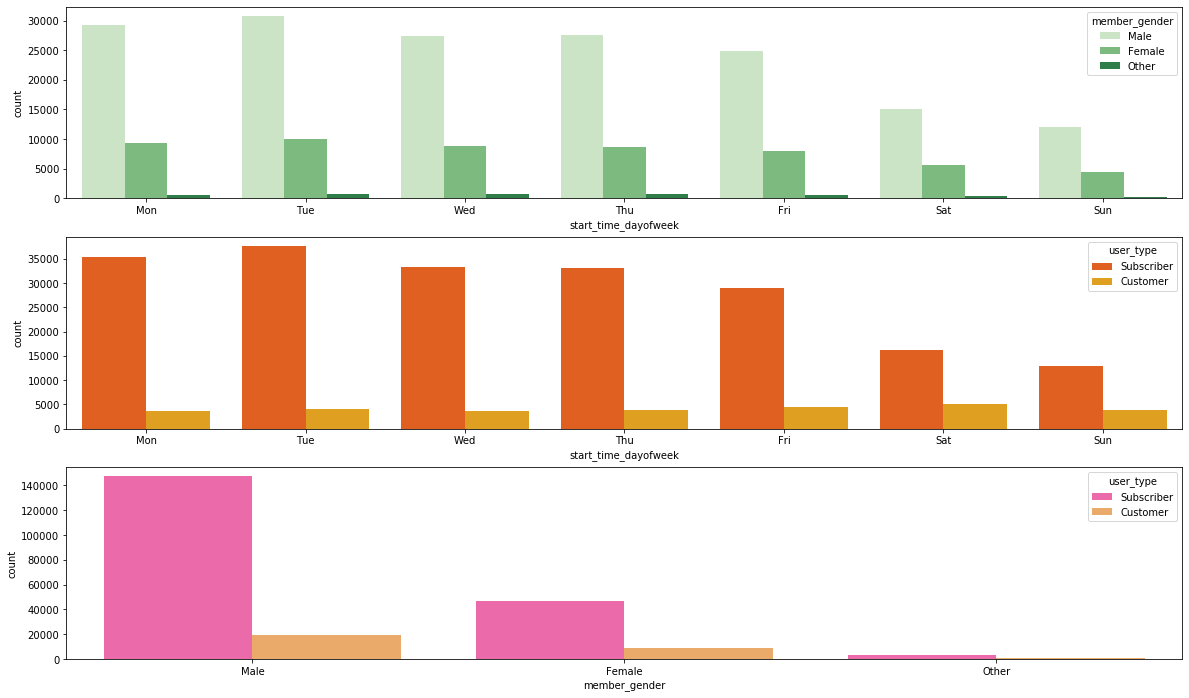

In [7]:
plt.figure(figsize = [20, 12]);

ax = plt.subplot(3, 1, 1)
sb.countplot(data = gobike, x = 'start_time_dayofweek', hue = 'member_gender', palette = 'Greens');

ax = plt.subplot(3, 1, 2);
sb.countplot(data = gobike, x = 'start_time_dayofweek', hue = 'user_type', palette = 'autumn');

ax = plt.subplot(3, 1, 3);
sb.countplot(data = gobike, x = 'member_gender', hue = 'user_type', palette = 'spring');

<h2>Age Distribution</h2>

During the week, there are more younger riders below the age of 40 than older riders.
More riders bike longer on Saturdays and Sundays than on other days of the week.

In [8]:
age_flag1 = (gobike['member_age'] < 40)
age_below_forty = gobike.loc[age_flag1,:]

age_flag2 = (gobike['member_age'] >= 40)
age_above_forty = gobike.loc[age_flag2,:]

In [ ]:
fig = plt.figure(figsize = [16,8])
ax = sb.pointplot(data = age_below_forty, x = 'start_time_hour', y = 'duration_min', hue = 'start_time_dayofweek',
           palette = 'Greens', linestyles = '', dodge = 0.5);
plt.title('Biking durations for bikers younger than 40 years old across dayofweek and hour');
plt.ylabel('Mean Duration (min)');
plt.yscale('log');
plt.yticks([1, 2, 5, 10, 20, 50, 100], [1, 2, 5, 10, 20, 50, 100]);
ax.set_yticklabels([],minor = True);

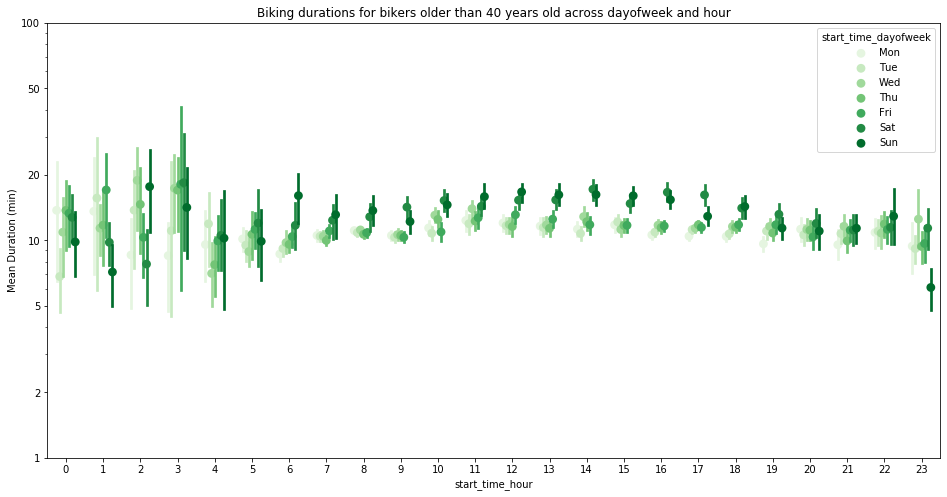

In [ ]:
fig = plt.figure(figsize = [16,8])
ax = sb.pointplot(data = age_above_forty, x = 'start_time_hour', y = 'duration_min', hue = 'start_time_dayofweek',
           palette = 'Greens', linestyles = '', dodge = 0.5);
plt.title('Biking durations for bikers older than 40 years old across dayofweek and hour');
plt.ylabel('Mean Duration (min)');
plt.yscale('log');
plt.yticks([1, 2, 5, 10, 20, 50, 100], [1, 2, 5, 10, 20, 50, 100]);
ax.set_yticklabels([],minor = True);